In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# **Chia train test theo tỉ lệ 8:2**

In [2]:
# 2. Đọc file dữ liệu tiền mã hóa Bitcoin và chia train test theo tỉ lệ 8:2
df = pd.read_csv('Btc.csv')
df = df[['Close']]
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing sets
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [3]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [4]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

In [5]:
# 5. Đánh giá độ chính xác
test_mae = mean_absolute_error(y_pred, y_test)
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mape = mean_absolute_percentage_error(y_pred, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 11692.627774801158
Testing RMSE: 13644.260186221754
Testing MAPE: 0.27294493080509746


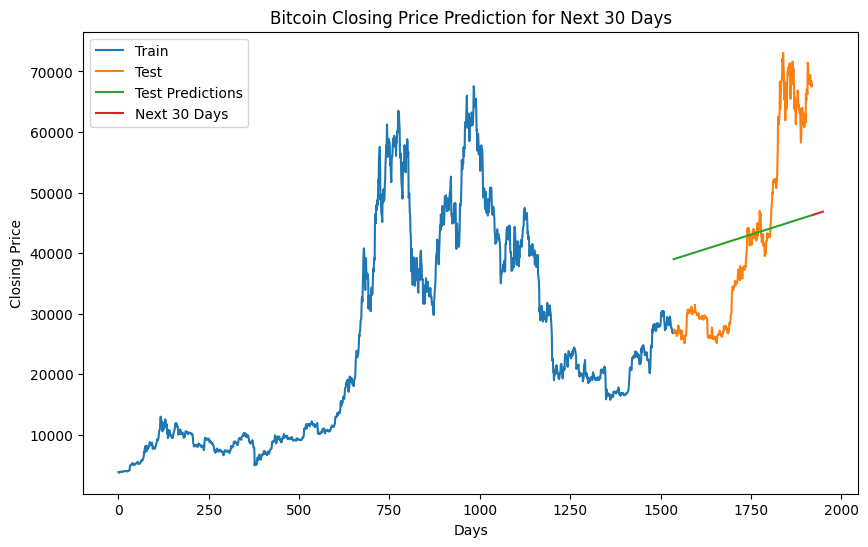

Predicted closing prices for the next 30 days:
[46297.20351913 46316.20659249 46335.20966585 46354.21273921
 46373.21581257 46392.21888594 46411.2219593  46430.22503266
 46449.22810602 46468.23117938 46487.23425274 46506.23732611
 46525.24039947 46544.24347283 46563.24654619 46582.24961955
 46601.25269291 46620.25576627 46639.25883964 46658.261913
 46677.26498636 46696.26805972 46715.27113308 46734.27420644
 46753.27727981 46772.28035317 46791.28342653 46810.28649989
 46829.28957325 46848.29264661]


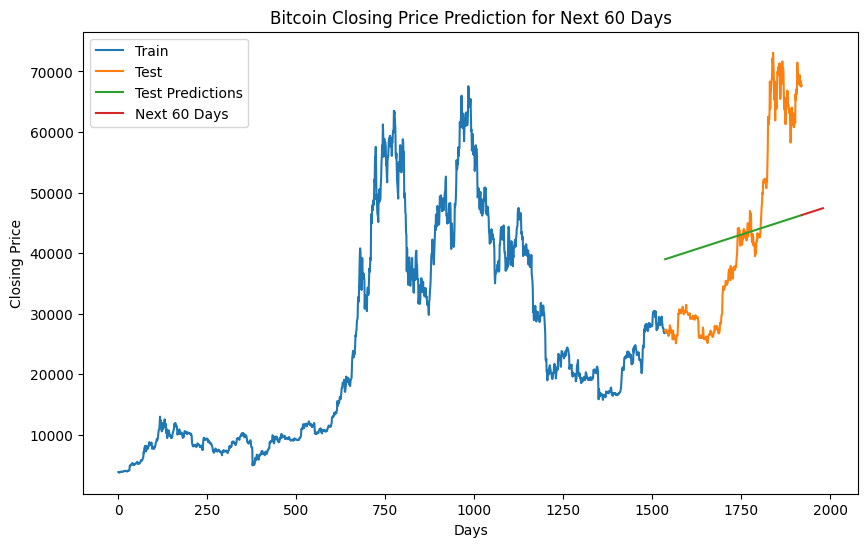

Predicted closing prices for the next 60 days:
[46297.20351913 46316.20659249 46335.20966585 46354.21273921
 46373.21581257 46392.21888594 46411.2219593  46430.22503266
 46449.22810602 46468.23117938 46487.23425274 46506.23732611
 46525.24039947 46544.24347283 46563.24654619 46582.24961955
 46601.25269291 46620.25576627 46639.25883964 46658.261913
 46677.26498636 46696.26805972 46715.27113308 46734.27420644
 46753.27727981 46772.28035317 46791.28342653 46810.28649989
 46829.28957325 46848.29264661 46867.29571998 46886.29879334
 46905.3018667  46924.30494006 46943.30801342 46962.31108678
 46981.31416015 47000.31723351 47019.32030687 47038.32338023
 47057.32645359 47076.32952695 47095.33260032 47114.33567368
 47133.33874704 47152.3418204  47171.34489376 47190.34796712
 47209.35104049 47228.35411385 47247.35718721 47266.36026057
 47285.36333393 47304.36640729 47323.36948066 47342.37255402
 47361.37562738 47380.37870074 47399.3817741  47418.38484746]


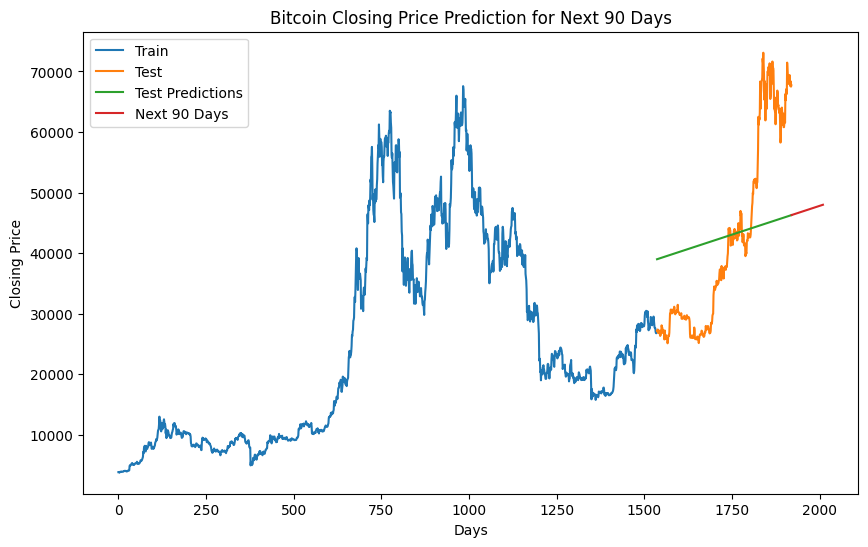

Predicted closing prices for the next 90 days:
[46297.20351913 46316.20659249 46335.20966585 46354.21273921
 46373.21581257 46392.21888594 46411.2219593  46430.22503266
 46449.22810602 46468.23117938 46487.23425274 46506.23732611
 46525.24039947 46544.24347283 46563.24654619 46582.24961955
 46601.25269291 46620.25576627 46639.25883964 46658.261913
 46677.26498636 46696.26805972 46715.27113308 46734.27420644
 46753.27727981 46772.28035317 46791.28342653 46810.28649989
 46829.28957325 46848.29264661 46867.29571998 46886.29879334
 46905.3018667  46924.30494006 46943.30801342 46962.31108678
 46981.31416015 47000.31723351 47019.32030687 47038.32338023
 47057.32645359 47076.32952695 47095.33260032 47114.33567368
 47133.33874704 47152.3418204  47171.34489376 47190.34796712
 47209.35104049 47228.35411385 47247.35718721 47266.36026057
 47285.36333393 47304.36640729 47323.36948066 47342.37255402
 47361.37562738 47380.37870074 47399.3817741  47418.38484746
 47437.38792083 47456.39099419 47475.394

In [6]:
# 6. Dự đoán cho 30, 60, 90 ngày tiếp theo
future_days = [30, 60, 90]
for days in future_days:
    last_index = df.index[-1]
    x_future = np.array(range(last_index+1, last_index+1+days)).reshape(-1, 1)
    y_future = model.predict(x_future)

    # Vẽ hình
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data['Close'], label='Train')
    plt.plot(test_data.index, test_data['Close'], label='Test')
    plt.plot(test_data.index, y_pred, label='Test Predictions')
    plt.plot(range(last_index+1, last_index+1+days), y_future, label=f'Next {days} Days')
    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(y_future)

# **Chia train test theo tỉ lệ 7:3**

In [7]:
# 2. Đọc file dữ liệu tiền mã hóa Bitcoin và chia train test theo tỉ lệ 7:3
df = pd.read_csv('Btc.csv')
df = df[['Close']]
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing sets
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [8]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [9]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

In [10]:
# 5. Đánh giá độ chính xác
test_mae = mean_absolute_error(y_pred, y_test)
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mape = mean_absolute_percentage_error(y_pred, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 19525.076572219732
Testing RMSE: 21068.869234469774
Testing MAPE: 0.3825633661907034


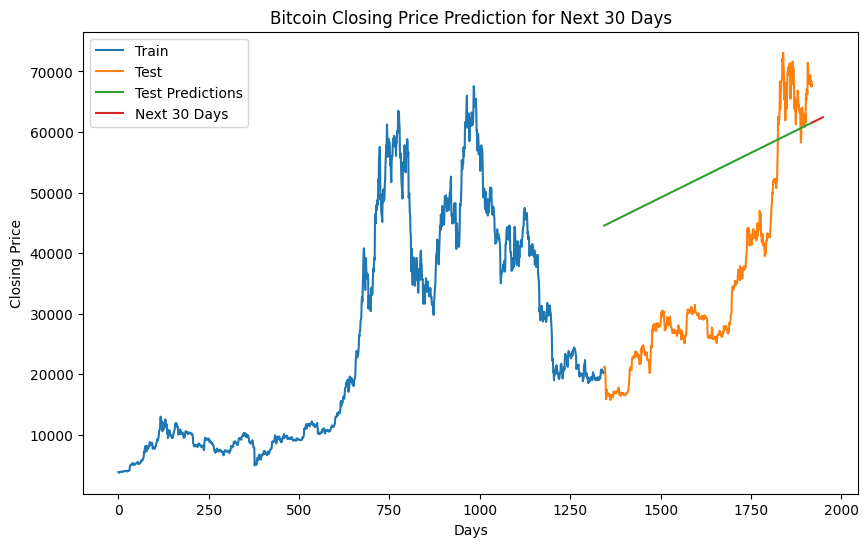

Predicted closing prices for the next 30 days:
[61581.1354047  61610.69576727 61640.25612983 61669.8164924
 61699.37685496 61728.93721753 61758.49758009 61788.05794266
 61817.61830523 61847.17866779 61876.73903036 61906.29939292
 61935.85975549 61965.42011805 61994.98048062 62024.54084319
 62054.10120575 62083.66156832 62113.22193088 62142.78229345
 62172.34265601 62201.90301858 62231.46338115 62261.02374371
 62290.58410628 62320.14446884 62349.70483141 62379.26519397
 62408.82555654 62438.38591911]


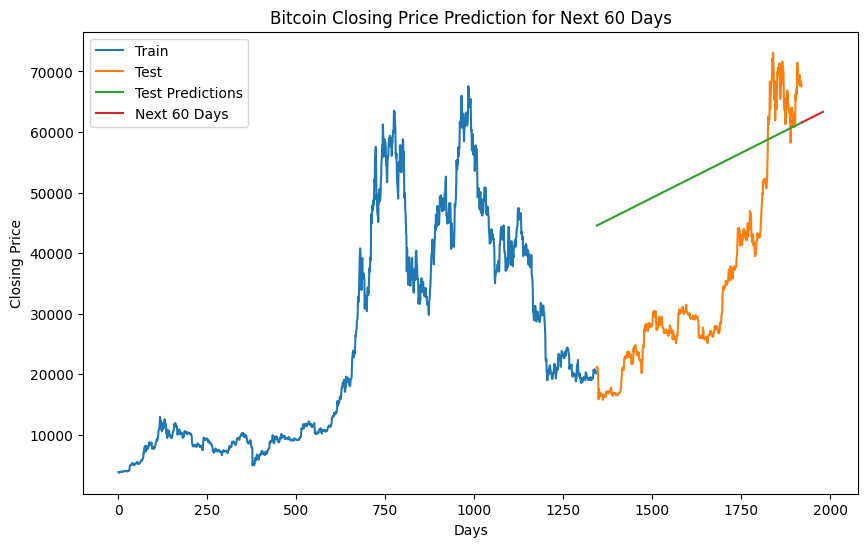

Predicted closing prices for the next 60 days:
[61581.1354047  61610.69576727 61640.25612983 61669.8164924
 61699.37685496 61728.93721753 61758.49758009 61788.05794266
 61817.61830523 61847.17866779 61876.73903036 61906.29939292
 61935.85975549 61965.42011805 61994.98048062 62024.54084319
 62054.10120575 62083.66156832 62113.22193088 62142.78229345
 62172.34265601 62201.90301858 62231.46338115 62261.02374371
 62290.58410628 62320.14446884 62349.70483141 62379.26519397
 62408.82555654 62438.38591911 62467.94628167 62497.50664424
 62527.0670068  62556.62736937 62586.18773193 62615.7480945
 62645.30845707 62674.86881963 62704.4291822  62733.98954476
 62763.54990733 62793.11026989 62822.67063246 62852.23099503
 62881.79135759 62911.35172016 62940.91208272 62970.47244529
 63000.03280785 63029.59317042 63059.15353299 63088.71389555
 63118.27425812 63147.83462068 63177.39498325 63206.95534581
 63236.51570838 63266.07607095 63295.63643351 63325.19679608]


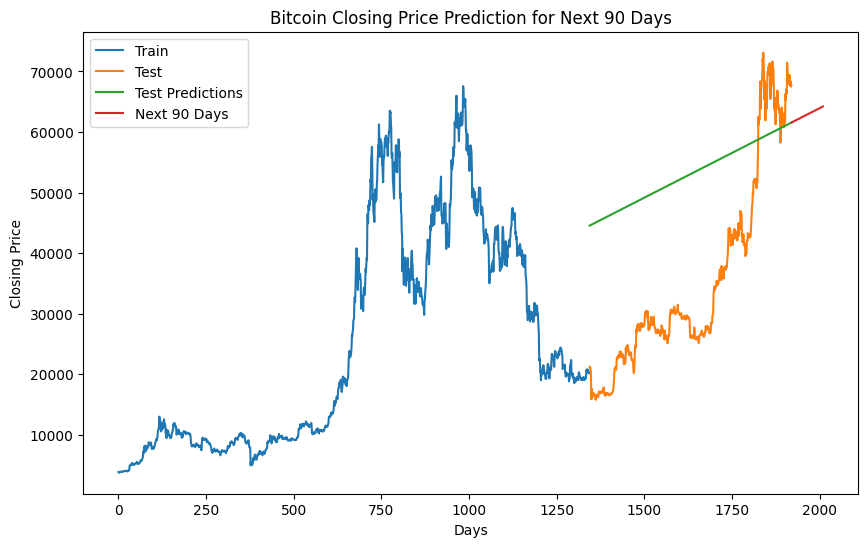

Predicted closing prices for the next 90 days:
[61581.1354047  61610.69576727 61640.25612983 61669.8164924
 61699.37685496 61728.93721753 61758.49758009 61788.05794266
 61817.61830523 61847.17866779 61876.73903036 61906.29939292
 61935.85975549 61965.42011805 61994.98048062 62024.54084319
 62054.10120575 62083.66156832 62113.22193088 62142.78229345
 62172.34265601 62201.90301858 62231.46338115 62261.02374371
 62290.58410628 62320.14446884 62349.70483141 62379.26519397
 62408.82555654 62438.38591911 62467.94628167 62497.50664424
 62527.0670068  62556.62736937 62586.18773193 62615.7480945
 62645.30845707 62674.86881963 62704.4291822  62733.98954476
 62763.54990733 62793.11026989 62822.67063246 62852.23099503
 62881.79135759 62911.35172016 62940.91208272 62970.47244529
 63000.03280785 63029.59317042 63059.15353299 63088.71389555
 63118.27425812 63147.83462068 63177.39498325 63206.95534581
 63236.51570838 63266.07607095 63295.63643351 63325.19679608
 63354.75715864 63384.31752121 63413.877

In [11]:
# 6. Dự đoán cho 30, 60, 90 ngày tiếp theo
future_days = [30, 60, 90]
for days in future_days:
    last_index = df.index[-1]
    x_future = np.array(range(last_index+1, last_index+1+days)).reshape(-1, 1)
    y_future = model.predict(x_future)

    # Vẽ hình
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data['Close'], label='Train')
    plt.plot(test_data.index, test_data['Close'], label='Test')
    plt.plot(test_data.index, y_pred, label='Test Predictions')
    plt.plot(range(last_index+1, last_index+1+days), y_future, label=f'Next {days} Days')
    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(y_future)

# **Chia train test theo tỉ lệ 6:4**

In [12]:
# 2. Đọc file dữ liệu tiền mã hóa Bitcoin và chia train test theo tỉ lệ 6:4
df = pd.read_csv('Btc.csv')
df = df[['Close']]
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing sets
train_size = int(0.6 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [13]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [14]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

In [15]:
# 5. Đánh giá độ chính xác
test_mae = mean_absolute_error(y_pred, y_test)
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mape = mean_absolute_percentage_error(y_pred, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 38729.78418138885
Testing RMSE: 39858.18257822694
Testing MAPE: 0.5557889788131574


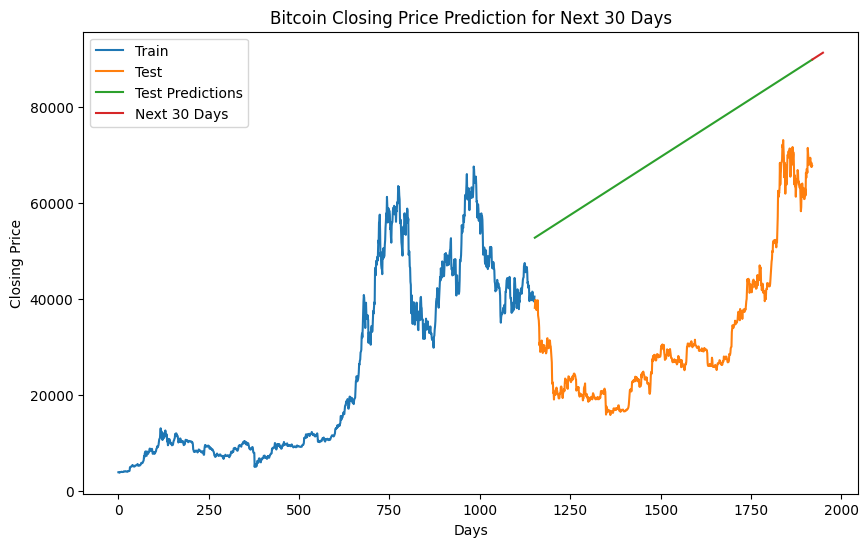

Predicted closing prices for the next 30 days:
[89882.32888918 89930.69614725 89979.06340533 90027.43066341
 90075.79792148 90124.16517956 90172.53243764 90220.89969572
 90269.26695379 90317.63421187 90366.00146995 90414.36872802
 90462.7359861  90511.10324418 90559.47050225 90607.83776033
 90656.20501841 90704.57227648 90752.93953456 90801.30679264
 90849.67405071 90898.04130879 90946.40856687 90994.77582495
 91043.14308302 91091.5103411  91139.87759918 91188.24485725
 91236.61211533 91284.97937341]


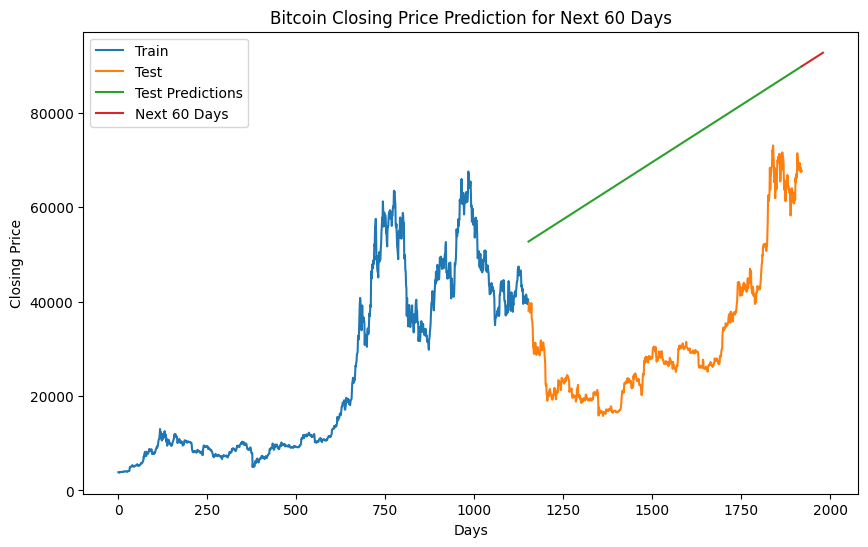

Predicted closing prices for the next 60 days:
[89882.32888918 89930.69614725 89979.06340533 90027.43066341
 90075.79792148 90124.16517956 90172.53243764 90220.89969572
 90269.26695379 90317.63421187 90366.00146995 90414.36872802
 90462.7359861  90511.10324418 90559.47050225 90607.83776033
 90656.20501841 90704.57227648 90752.93953456 90801.30679264
 90849.67405071 90898.04130879 90946.40856687 90994.77582495
 91043.14308302 91091.5103411  91139.87759918 91188.24485725
 91236.61211533 91284.97937341 91333.34663148 91381.71388956
 91430.08114764 91478.44840571 91526.81566379 91575.18292187
 91623.55017994 91671.91743802 91720.2846961  91768.65195418
 91817.01921225 91865.38647033 91913.75372841 91962.12098648
 92010.48824456 92058.85550264 92107.22276071 92155.59001879
 92203.95727687 92252.32453494 92300.69179302 92349.0590511
 92397.42630918 92445.79356725 92494.16082533 92542.52808341
 92590.89534148 92639.26259956 92687.62985764 92735.99711571]


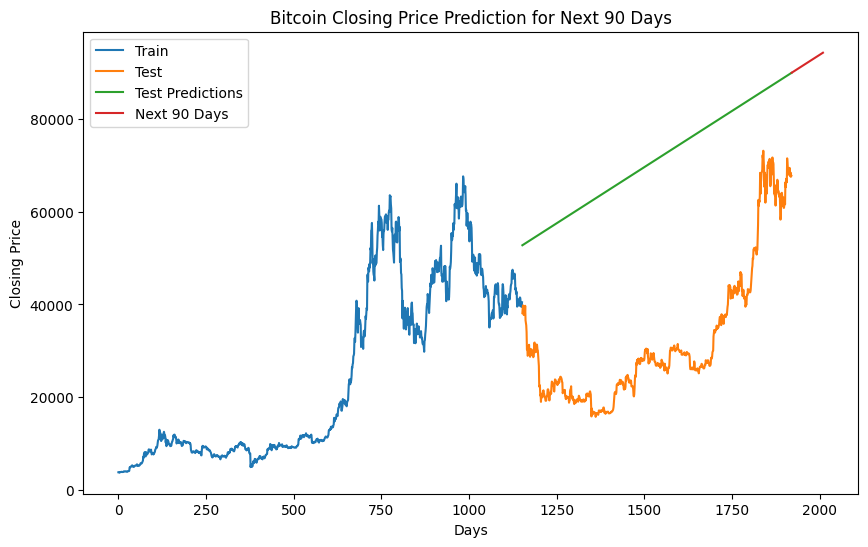

Predicted closing prices for the next 90 days:
[89882.32888918 89930.69614725 89979.06340533 90027.43066341
 90075.79792148 90124.16517956 90172.53243764 90220.89969572
 90269.26695379 90317.63421187 90366.00146995 90414.36872802
 90462.7359861  90511.10324418 90559.47050225 90607.83776033
 90656.20501841 90704.57227648 90752.93953456 90801.30679264
 90849.67405071 90898.04130879 90946.40856687 90994.77582495
 91043.14308302 91091.5103411  91139.87759918 91188.24485725
 91236.61211533 91284.97937341 91333.34663148 91381.71388956
 91430.08114764 91478.44840571 91526.81566379 91575.18292187
 91623.55017994 91671.91743802 91720.2846961  91768.65195418
 91817.01921225 91865.38647033 91913.75372841 91962.12098648
 92010.48824456 92058.85550264 92107.22276071 92155.59001879
 92203.95727687 92252.32453494 92300.69179302 92349.0590511
 92397.42630918 92445.79356725 92494.16082533 92542.52808341
 92590.89534148 92639.26259956 92687.62985764 92735.99711571
 92784.36437379 92832.73163187 92881.09

In [16]:
# 6. Dự đoán cho 30, 60, 90 ngày tiếp theo
future_days = [30, 60, 90]
for days in future_days:
    last_index = df.index[-1]
    x_future = np.array(range(last_index+1, last_index+1+days)).reshape(-1, 1)
    y_future = model.predict(x_future)

    # Vẽ hình
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data['Close'], label='Train')
    plt.plot(test_data.index, test_data['Close'], label='Test')
    plt.plot(test_data.index, y_pred, label='Test Predictions')
    plt.plot(range(last_index+1, last_index+1+days), y_future, label=f'Next {days} Days')
    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(y_future)